In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

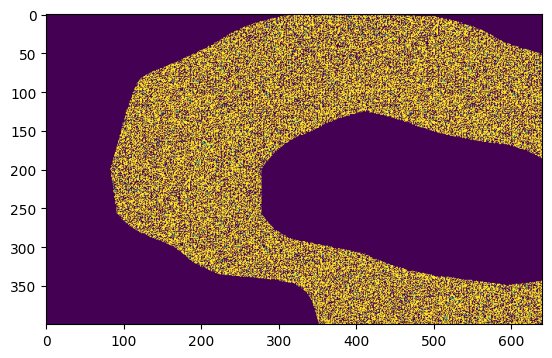

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [19]:
image = cv2.imread('train_screen.png', cv2.IMREAD_UNCHANGED)
H, W  = image.shape[:2]
ch = image[:,:,0]

## zoom in to center
ch = ch[H//4:H//4*2, W//4:W//4*2]

plt.imshow(ch)
plt.show()
print(np.unique(ch))

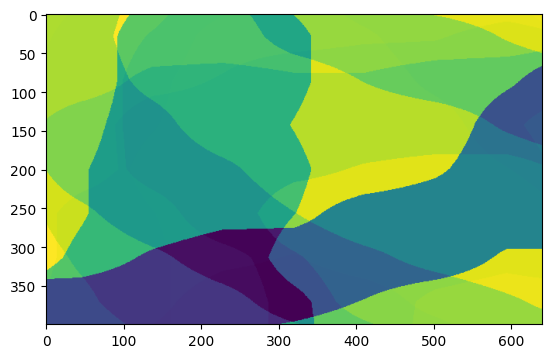

[  1   3   9  10  11  19  33  40  41  42  43  58  62  65  67  73  81  83
  97  99 105 113 115 129 130 131 134 138 139 142 147 150 151 158 161 162
 163 166 167 170 179 182 183 186 190 193 195 202 206 209 211 213 215 222
 223 225 227 234 238 241 243 245 247 250 254]


In [20]:
image = cv2.imread('val_screen.png', cv2.IMREAD_UNCHANGED)

ch = image[:,:,1]

## zoom in to center
ch = ch[H//4:H//4*2, W//4:W//4*2]

plt.imshow(ch)
plt.show()
print(np.unique(ch))